### Step 1: Generate datasets:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X=np.linspace(-3,3,1000).reshape(-1,1)
Y=X**2

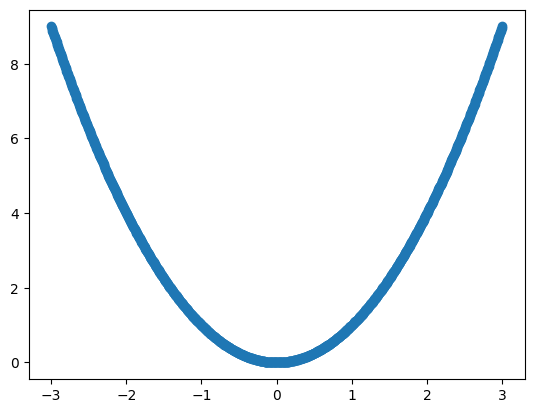

In [3]:
plt.scatter(X,Y)
plt.show()

### Step 2: Split the dataset as training and testing dataset

In [4]:
!pip install scikit-learn

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

### Step 3: Building Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [7]:
### Training the Model
lin_model.fit(xtrain,ytrain)
### Testing the Model
ypred_lin=lin_model.predict(xtest)

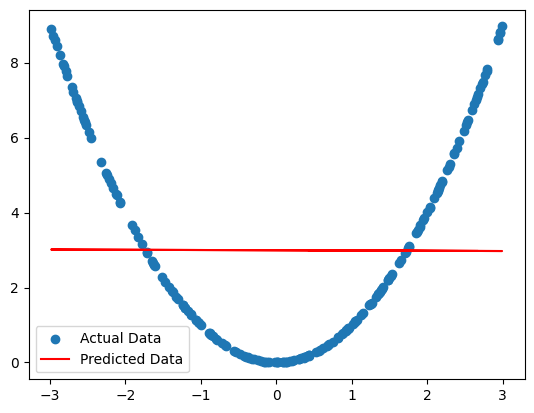

In [8]:
### Visualise the predicted model and the actual model
plt.scatter(xtest,ytest,label='Actual Data')
plt.plot(xtest,ypred_lin,label='Predicted Data',c='red')
plt.legend()
plt.show()

### Step 4: Building with ANN model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
### Architecture of ANN
nl_model=Sequential()
layer=Dense(20,activation='relu',input_shape=(1,))
nl_model.add(layer)### Hidden layer
nl_model.add(Dense(20,activation='relu'))
nl_model.add(Dense(1))

In [25]:
### Compile ANN
nl_model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [26]:
### Train the model
nl_model.fit(xtrain,ytrain,epochs=100,verbose=0)  ###epochs=100 means runs the whole data 100 times

In [27]:
### Testing the model
ypred_nl=nl_model.predict(xtest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


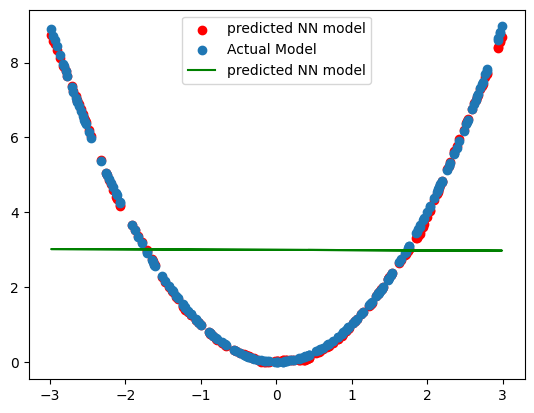

In [32]:
### Visualise the model
plt.scatter(xtest,ypred_nl,c='red',label='predicted NN model',linestyle='-')
plt.scatter(xtest,ytest,label='Actual Model')
plt.plot(xtest,ypred_lin,label='predicted NN model',c='green')
plt.legend()
plt.show()  ### adding the valid datapoints(-3,3,100)->(-3,3,1000); adding more hidden layers creates a more accuate model
### not necessary that if u increase the no.of neurons then accuracy will increase

 ### Evaluate ANN model using some metrics

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [34]:
mse=mean_squared_error(ytest,ypred_nl)
mae=mean_absolute_error(ytest,ypred_nl)
r2=r2_score(ytest,ypred_nl)

In [35]:
print("MSE:{}".format(mse))
print("MAE:{}".format(mae))
print("R2 Score: {}".format(r2))

MSE:0.0046455217031799315
MAE:0.04595511365632682
R2 Score: 0.9993806324506392
